In [17]:
from generateMazeMaps import generate_random_maze
import pickle
import os
from os import path as osp
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [7]:
def pix2geom(pos, res=0.05, length=24):
    """
    Converts pixel co-ordinates to geometrical positions. 
    :param pos: The (x,y) pixel co-ordinates.
    :param res: The distance represented by each pixel.
    :param length: The length of the map in meters.
    :returns (float, float): The associated eucledian co-ordinates.
    """
    return (pos[0]*res, length-pos[1]*res)

def geom2pix(pos, res=0.05, size=(480, 480)):
    """
    Convert geometrical position to pixel co-ordinates. The origin 
    is assumed to be at [image_size[0]-1, 0].
    :param pos: The (x,y) geometric co-ordinates.
    :param res: The distance represented by each pixel.
    :param size: The size of the map image
    :returns (int, int): The associated pixel co-ordinates.
    NOTE: The Pixel co-ordinates are represented as follows:
    (0,0)------ X ----------->|
    |                         |  
    |                         |  
    |                         |  
    |                         |  
    Y                         |
    |                         |
    |                         |  
    v                         |  
    ---------------------------  
    """
    return (np.int(np.floor(pos[0]/res)), np.int(size[0]-1-np.floor(pos[1]/res)))

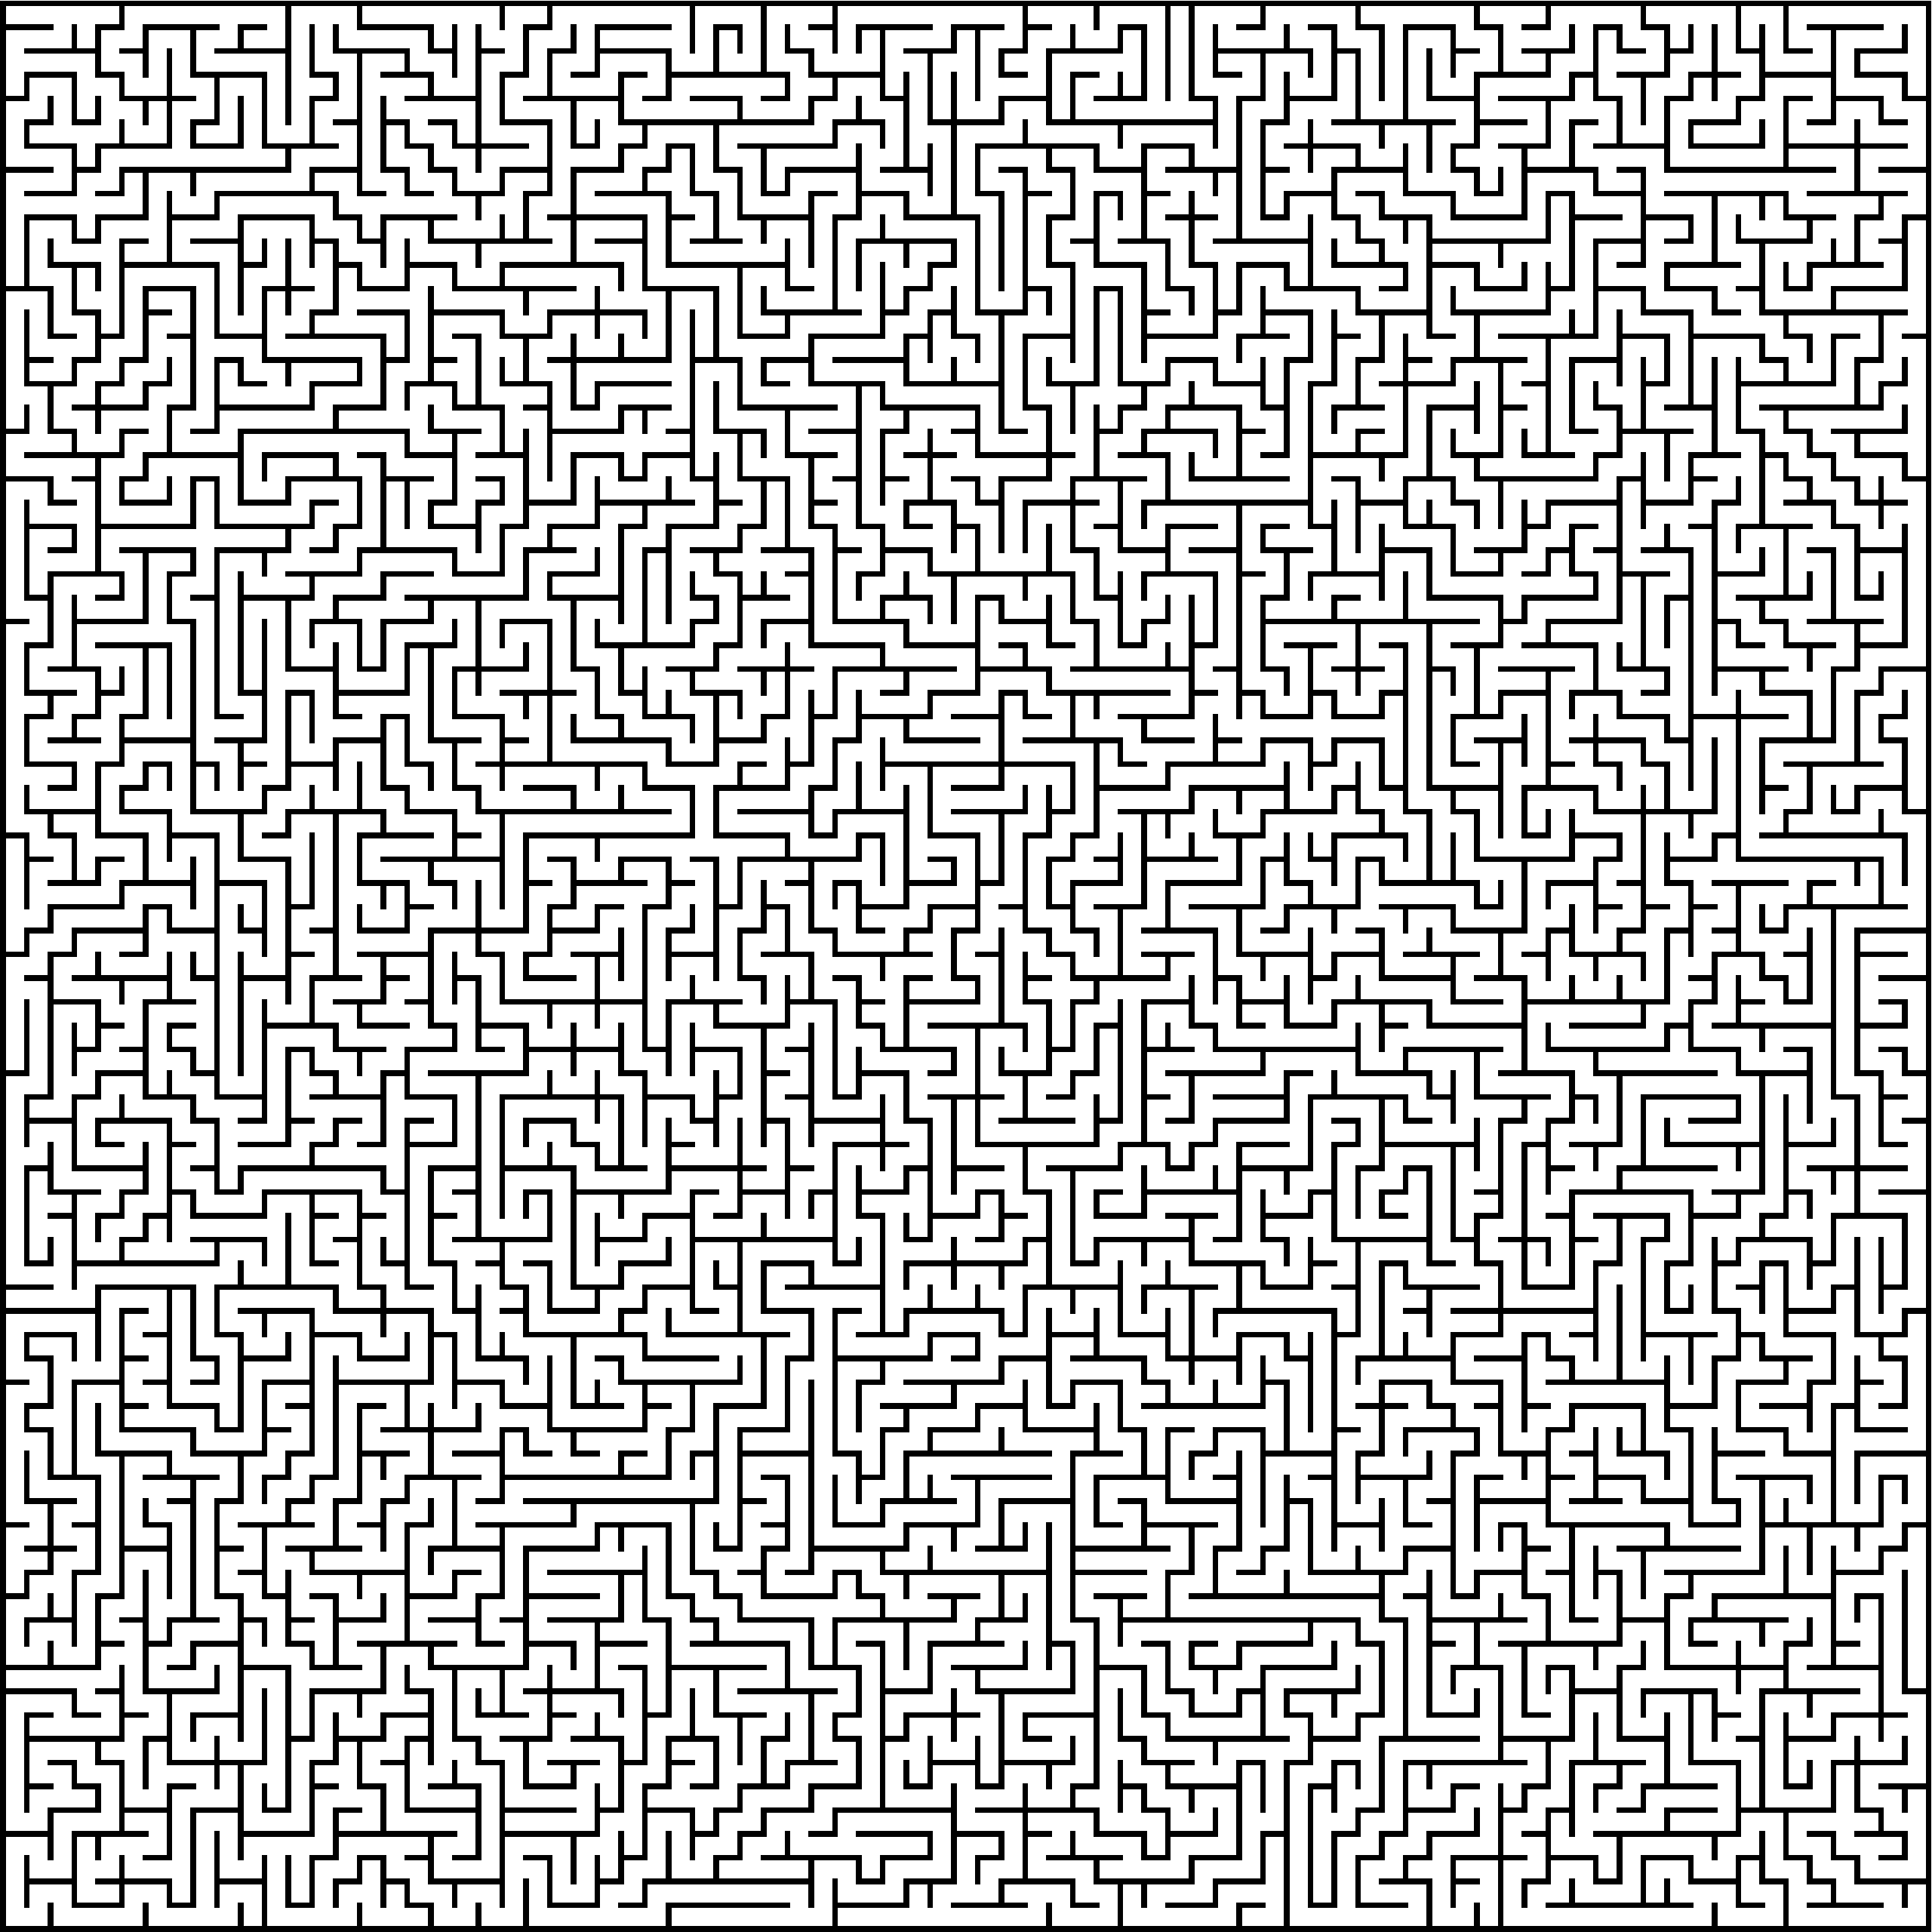

In [3]:
generate_random_maze(128, 128)

# Generate start and end points

/var/folders/9y/z2bqwbbj4d57_1qbhnm0mb3m0000gn/T/ipykernel_4132/3876094095.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.int(np.floor(pos[0]/res)), np.int(size[0]-1-np.floor(pos[1]/res)))


(-0.5, 479.5, 479.5, -0.5)

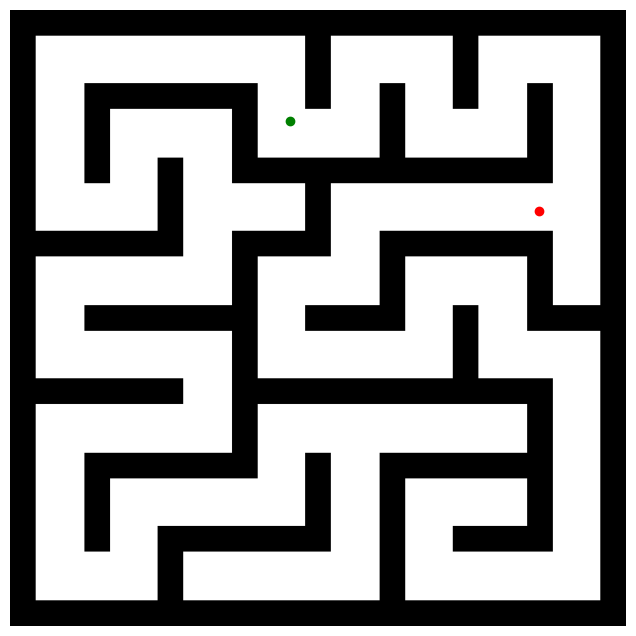

In [25]:
file_path = "maze4/train/env000000"
data = pickle.load(open(osp.join(file_path, f'path_{5}.p'), 'rb'))
path = data['path_interpolated']
goal_pos = geom2pix(path[0, :])
start_pos = geom2pix(path[-1, :])

MazeMap = io.imread(osp.join(file_path, f'map_{0}.png'), as_gray=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(MazeMap, cmap='gray')
ax.scatter(goal_pos[0], goal_pos[1], color='r', zorder=3)
ax.scatter(start_pos[0], start_pos[1], color='g', zorder=3)
ax.axis('off')


# Create ground truth patches

/var/folders/9y/z2bqwbbj4d57_1qbhnm0mb3m0000gn/T/ipykernel_4132/3876094095.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.int(np.floor(pos[0]/res)), np.int(size[0]-1-np.floor(pos[1]/res)))


(-0.5, 479.5, 479.5, -0.5)

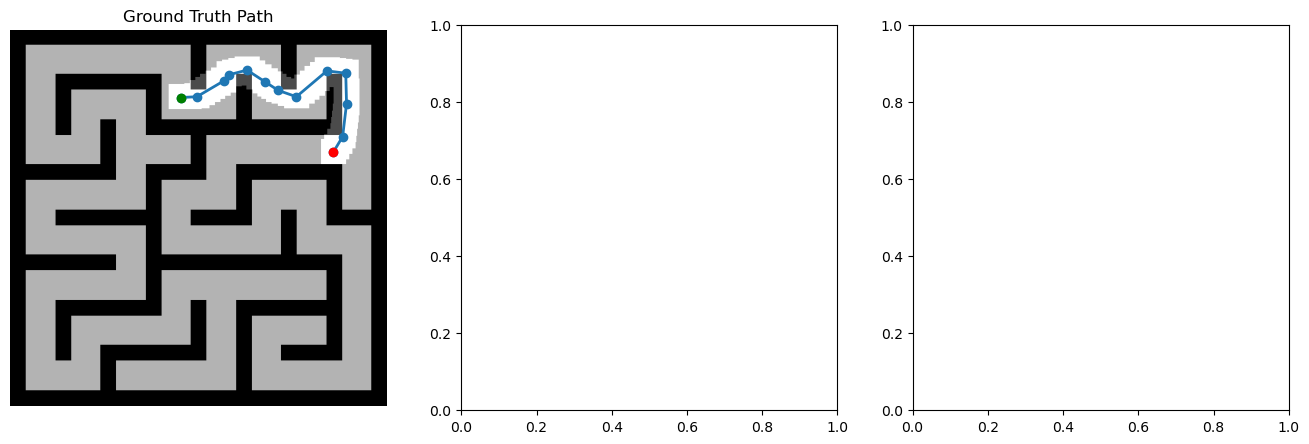

In [26]:
pathPix = [geom2pix(pos) for pos in path]

uniqueId = []
for pos in pathPix:
    if pos not in uniqueId:
        uniqueId.append(pos)
pathPixelPos = np.array([geom2pix(pos) for pos in data['path']])# Generate Patch Maps
truePatchMap = np.zeros_like(MazeMap)
map_size = MazeMap.shape
receptive_field = 32
for pos in uniqueId:
    goal_start_x = max(0, pos[0]- receptive_field//2)
    goal_start_y = max(0, pos[1]- receptive_field//2)
    goal_end_x = min(map_size[0], pos[0]+ receptive_field//2)
    goal_end_y = min(map_size[1], pos[1]+ receptive_field//2)
    truePatchMap[goal_start_y:goal_end_y, goal_start_x:goal_end_x] = 1.0

fig, ax = plt.subplots(1, 3, figsize=(16.5,5), dpi=100)
ax[0].set_title('Ground Truth Path')
ax[0].imshow(MazeMap, cmap='gray')
ax[0].imshow(truePatchMap, cmap='gray', alpha=0.3)
ax[0].plot(pathPixelPos[:,0], pathPixelPos[:,1], marker='o', linewidth=2)
ax[0].scatter(goal_pos[0], goal_pos[1], color='r', zorder=3)
ax[0].scatter(start_pos[0], start_pos[1], color='g', zorder=3)
ax[0].axis('off')

In [4]:
data


{'path': array([[21.5084536 , 19.99785632],
        [21.35241768, 16.19134426],
        [21.34231594, 15.44871123]]),
 'path_interpolated': array([[21.5084536 , 19.99785632],
        [21.49111628, 19.57491053],
        [21.47377895, 19.15196475],
        [21.45644163, 18.72901897],
        [21.4391043 , 18.30607318],
        [21.42176698, 17.8831274 ],
        [21.40442965, 17.46018162],
        [21.38709233, 17.03723583],
        [21.369755  , 16.61429005],
        [21.35241768, 16.19134426],
        [21.34231594, 15.44871123]]),
 'success': True}